In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.ChangingEpsilons import run_experiment

In [10]:
class Bandit:
    def __init__(self, m, limit):
        self.m = m
        self.N = 1
        self.mean = limit
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - (1.0/self.N))*self.mean + (1.0/self.N)*x

In [11]:
def run_experiment_oiv(m1, m2, m3, N, limit = 10):
    bandits = [Bandit(m1, limit), Bandit(m2, limit), Bandit(m3, limit)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
    
        data[i] = x
    cumulative_avg = np.cumsum(data)/(np.arange(N) + 1)  
    
    # plot moving average ctr
    plt.plot(cumulative_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)

    return cumulative_avg


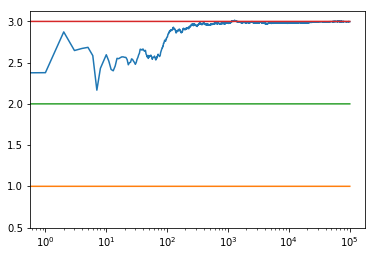

2.5504411835960563
2.818735465314142
2.997141368193517


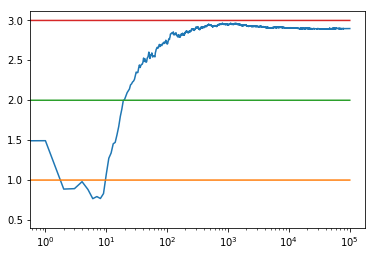

0.9985266746777128
2.030024863832657
2.9962164156515505


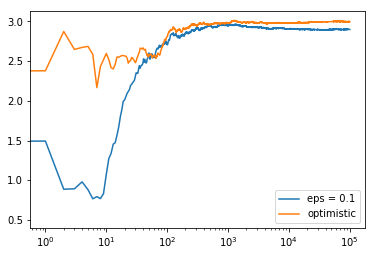

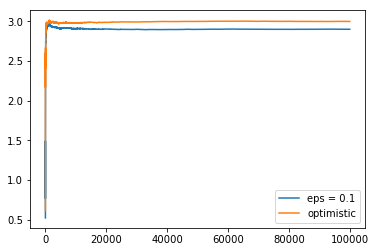

In [12]:
if __name__ == '__main__':
    oiv = run_experiment_oiv(1.0, 2.0, 3.0, 100000)
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

    
    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.show()